In [60]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation,model_selection
import matplotlib.pyplot as plt
%matplotlib inline

X.shape(100, 1),Y.shape(100,)


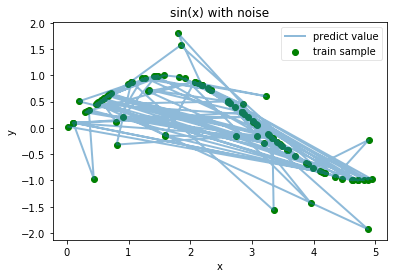

In [25]:
def create_data(n):
    np.random.seed(0)
    X=5*np.random.rand(n,1)  # 在(0,5)之间random取值.注意前面要乘以的5
    y=np.sin(X).ravel()
    noise_num=(int)(n/5)
    y[::5]+=3*(0.5-np.random.rand(noise_num))
    print("X.shape%s,Y.shape%s" %(X.shape,y.shape))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    #ax.set_xscale('log')
    ax.scatter(X,y,label="train sample",c='g')
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"y")
    ax.plot(X,y,label="predict value",linewidth=2,alpha=0.5)
    ax.set_title("sin(x) with noise")
    ax.legend(framealpha=0.5)
    plt.show()
    return model_selection.train_test_split(X,y,test_size=0.25,random_state=1)

X_train,X_test,y_train,y_test=create_data(100)

Train score:1.000000
Test score:0.789107


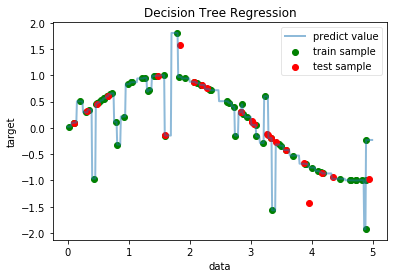

In [26]:
def test_DecisionTreeRegression(*data):
    X_train,X_test,y_train,y_test=data
    regr=DecisionTreeRegressor()
    regr.fit(X_train,y_train)
    print("Train score:%f" %(regr.score(X_train,y_train)))
    print("Test score:%f" %(regr.score(X_test,y_test)))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    X=np.arange(0.0,5.0,0.01)[:,np.newaxis]
    Y=regr.predict(X)
    #print(X)
    ax.scatter(X_train,y_train,label="train sample",c='g')
    ax.scatter(X_test,y_test,label="test sample",c='r')
    ax.plot(X,Y,label="predict value",linewidth=2,alpha=0.5)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()

test_DecisionTreeRegression(X_train,X_test,y_train,y_test)

### 结论
绿色点是训练的.因为我们数据集是从0->5.0中随机的100个点.最小刻度是0.01了.可以看到绿色训练点是过拟合的.得分达到1.00.把噪声也拟合了.

红色点是测试集.

然后我们把0->5.0以0.01方式穷尽500个样本,得到的如图上.

In [28]:
def test_DecisionTreeRegression_spliter(*data):
    X_train,X_test,y_train,y_test=data
    spliters=['best','random']
    scores=[]
    for spliter in spliters:
        regr = DecisionTreeRegressor(splitter=spliter)
        regr.fit(X_train,y_train)
        print("Spliter:%s" %spliter)
        print("Train score:%f" %(regr.score(X_train,y_train)))
        print("Test score:%f" %(regr.score(X_test,y_test)))
        
test_DecisionTreeRegression_spliter(X_train,X_test,y_train,y_test)    

Spliter:best
Train score:1.000000
Test score:0.789107
Spliter:random
Train score:1.000000
Test score:0.641796


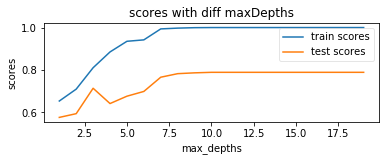

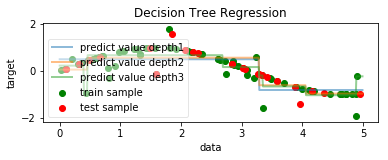

In [62]:
def test_DecisionTreeRegerssion_Depth(*data,maxdepth):
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    train_scores=[]
    test_scores=[]
    regs={}
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test,y_test))
        regs[depth]=regr
        
    fig=plt.figure()
    ax=fig.add_subplot(2,1,1)
    ax.plot(depths,train_scores,label='train scores')
    ax.plot(depths,test_scores,label='test scores')
    ax.set_xlabel("max_depths")
    ax.set_ylabel("scores")
    ax.set_title("scores with diff maxDepths")
    ax.legend(framealpha=0.5)
    plt.show()
    fig=plt.figure()
    ax=fig.add_subplot(2,1,2)
    X=np.arange(0.0,5.0,0.01)[:,np.newaxis]
    index_depth = regs.keys()
    max_show_depth=np.arange(1,4)
    for i in max_show_depth:
        Y=regs[i].predict(X)
        ax.plot(X,Y,label="predict value depth%s" %i,linewidth=2,alpha=0.5)
    ax.scatter(X_train,y_train,label="train sample",c='g')
    ax.scatter(X_test,y_test,label="test sample",c='r')
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()

test_DecisionTreeRegerssion_Depth(X_train,X_test,y_train,y_test,maxdepth=20)